<a href="https://colab.research.google.com/github/Matteriegray/Metrics/blob/main/C_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
df = load_breast_cancer(as_frame=True)
df = df.frame

x = df.drop('target',axis=1)
y = df[['target']]
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=5, max_depth=2)
rf.fit(X_train, y_train.values.flatten())

RandomForestClassifier(max_depth=2, n_estimators=5)

In [ ]:
# Get predicted class probabilities for the test set
y_pred_prob = rf.predict_proba(X_test)[:, 1]

In [ ]:
# Compute the false positive rate (FPR)
# and true positive rate (TPR) for different classification thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)

In [ ]:
# Compute the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
roc_auc

0.9635549872122762

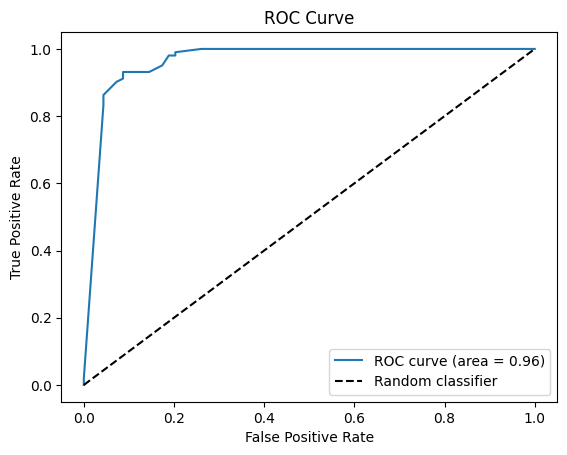

In [ ]:
# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# roc curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

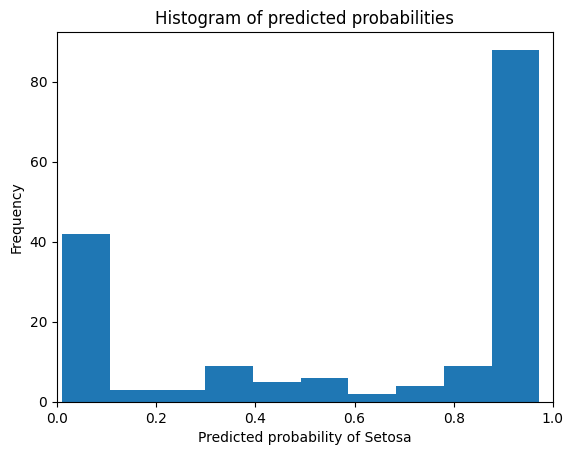

In [ ]:
# Plot the predicted class probabilities
plt.hist(y_pred_prob, bins=10)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of Setosa')
plt.ylabel('Frequency')
plt.show()